In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [72]:
%matplotlib notebook

In [73]:
%reload_ext autoreload
%autoreload 2

In [74]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

## Load and present one dataset

In [75]:
fname = r'/home/data_transfer/data_from_windows/20190617/Bead1/Discharge/Discharge_45.h5'
BDF = BeadDataFile.BeadDataFile(fname)

No cantilever data


In [76]:
fnmae = r'/home/data_transfer/data_from_windows/20190701/Bead2/InitialTest/Data1.h5'
BDF = BeadDataFile.BeadDataFile(fname)

No cantilever data


In [77]:
xyz2 = [BDF.x2, BDF.y2, BDF.z2]

## Discharge data

In [83]:
foldername = r'/data/new_trap/20190708/Bead2/Discharge/'
BDFs = load_dir(foldername, file_prefix='Discharge', max_file=633)

633  files in folder
633  files loaded


In [84]:
freq = 23
responses2 = [B.response_at_freq('z',drive_freq=freq) for B in BDFs]
responses4 = [B.response_at_freq('z',drive_freq=freq-2) for B in BDFs]
responses = [B.response_at_freq('x',drive_freq=freq) for B in BDFs]
responses3 = [B.response_at_freq3('y',drive_freq=freq) for B in BDFs] ## phase
Z = [np.mean(B.z2) for B in BDFs]

<IPython.core.display.Javascript object>


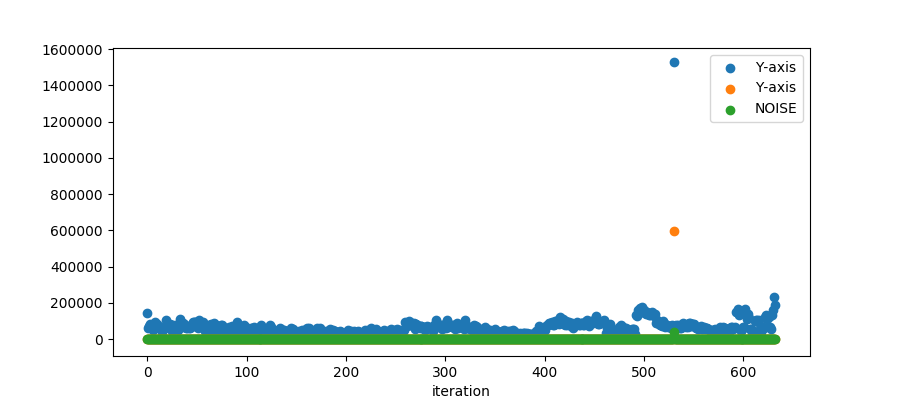

66714.39340493293 1547.2482628031082 99.81975115927611


In [89]:
_,ax = plt.subplots(figsize=(9,4))
rr = [np.std(resp_) for resp_ in responses]
rr2 = [np.std(resp_) for resp_ in responses2]
rr3 = [np.std(resp_) for resp_ in responses3]
rr4 = [np.std(resp_) for resp_ in responses4]

ax.scatter(range(len(rr)),rr, label='Y-axis')
ax.scatter(range(len(rr2)),rr2, label='Y-axis')
ax.scatter(range(len(rr4)),rr4, label='NOISE')
#ax.scatter(range(len(rr4)),(Z-np.mean(Z))/10+1, label='Z')

# ax.scatter(range(len(rr3)),rr3/rr3[-1], label='Y-phase')
ax.set(xlabel='iteration')
ax.legend()
print(np.mean(rr),np.mean(rr2),np.mean(rr4))

In [47]:
1.6e-19*20/4e-3

8e-16

In [53]:
SNR = np.mean(rr2)/np.mean(rr4)
1.6e-19*10/8.6e-3/SNR*0.65, SNR

(2.2802241955182736e-17, 5.3034360742169575)

In [ ]:
_,ax = plt.subplots()
i = 100
j = 40
ax.scatter(range(10000),responses[i][-10000:]/np.max(responses[i]))
ax.scatter(range(10000),responses[j][-10000:]/np.max(responses[j]))
# ax.scatter(range(50000),2.5+responses2[i]/np.max(responses2[i]))
# ax.set(ylim=(-2,5))

# Flashing decision

In [37]:
def decide(a, drive_freq, fname, AO):

    tmpp = 5
    if (a[-1]<(np.mean(a[-5:])+np.std(a[-5:]))):
        if (a[-1]>(np.mean(a[-5:])-np.std(a[-5:]))):
            tmpp = 0 ##flash

    return (np.mean(a[-5:])-np.std(a[-5:])),a[-1],(np.mean(a[-5:])+np.std(a[-5:])),tmpp

In [21]:
flash = np.array([decide(rr[:i], 23, 'dd',2) for i in range(4,200)])

In [38]:
_,ax = plt.subplots()
ax.scatter(range(len(flash.T[3])),flash.T[3])

<IPython.core.display.Javascript object>

NameError: name 'flash' is not defined

## Phase

In [90]:
freq = 23
responses2 = [B.response_at_freq2('z',drive_freq=freq) for B in BDFs]
responses = [B.response_at_freq2('z',drive_freq=freq) for B in BDFs]

In [91]:
import math 
import scipy

def phase_at_freq(data,drive_freq, fsamp):
    points = int(fsamp/drive_freq)*10
    t = np.linspace(0, 1/drive_freq, points)
    optimize_func = lambda x: x[0]*np.sin(2*math.pi*drive_freq*t) + x[1] - data[:points]/np.max(data[:points])
    est_amp, est_mean = scipy.optimize.leastsq(optimize_func, [1, 0])[0]
    return est_amp<0

In [92]:
phase = [phase_at_freq(res_,drive_freq=freq, fsamp=5000) for res_ in responses]
phase2 = np.array([phase_at_freq(res_,drive_freq=freq, fsamp=5000) for res_ in responses2])

In [93]:
phase2.T.shape

(633,)

<IPython.core.display.Javascript object>


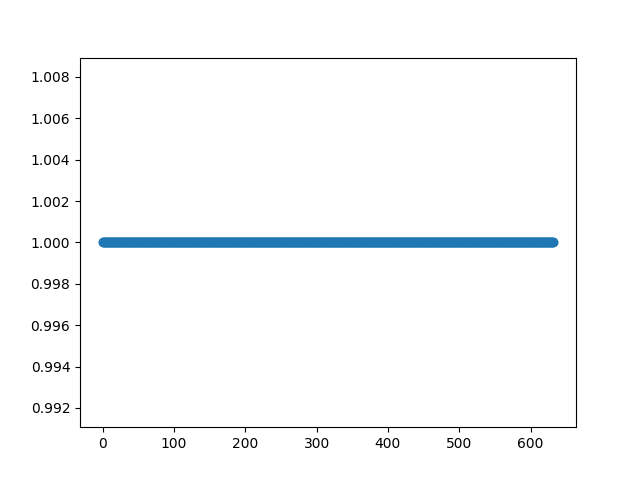

In [94]:
_,ax = plt.subplots()
#ax.scatter(range(len(phase)),phase)
#ax.scatter(range(len(phase)),phase)
ax.scatter(range(len(phase)),phase)

# Phase information

In [235]:
fname = r'/home/data_transfer/data_from_windows/20190617/Bead1/Discharge/Discharge_40.h5'
BDF = BeadDataFile.BeadDataFile(fname)

In [236]:
pos_phase = (BDF.phase[0]+BDF.phase[2])-(BDF.phase[1]+BDF.phase[3])

<IPython.core.display.Javascript object>


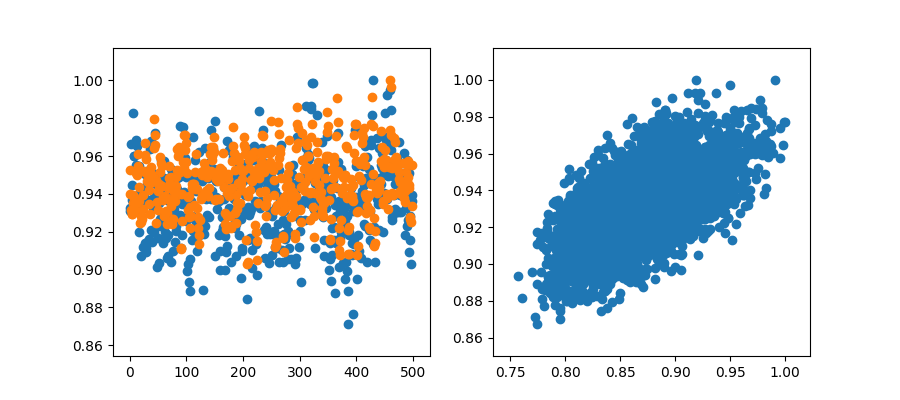

In [237]:
_,ax = plt.subplots(1,2, figsize=(9,4))
ax[0].scatter(range(500),pos_phase[:500]/np.max(pos_phase[:500]))
ax[0].scatter(range(500),BDF.y2[:500]/np.max(BDF.y2[:500]))
ax[1].scatter(pos_phase[:5000]/np.max(pos_phase[:5000]), BDF.y2[:5000]/np.max(BDF.y2[:5000]))

In [15]:
ypos_95 = BDF.response_at_freq2('y',95)[1000:30000]
yphase_95 = BDF.response_at_freq3('y',95)[1000:30000]

<IPython.core.display.Javascript object>


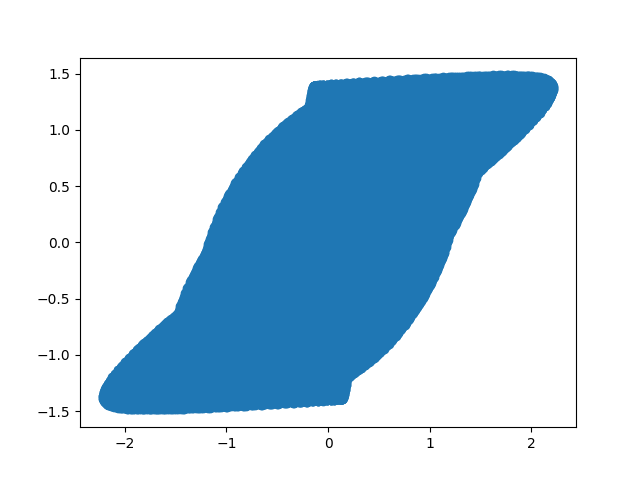

In [16]:
_,ax = plt.subplots()
ax.scatter(yphase_95/np.std(yphase_95), ypos_95/np.std(ypos_95))